Importing required libraries

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import gym

Importing discretization code from other notebook

In [1]:
%run discretization.ipynb


Action selection step


In [ ]:

def action_selection(Q, state, epsilon, n_actions):
    if np.random.random() < epsilon:
        return np.random.choice(n_actions)
    else:
        return np.argmax(Q[state])

SARSA algorithm

In [2]:
def sarsa(env, episodes, alpha, gamma, epsilon, n_bins, n_actions):
    Q = np.zeros([n_bins, n_bins, n_bins, n_bins, n_actions])
    episode_reward = []

    for episode in range(episodes):
        # define stat and action 
        state, _ = env.reset()
        state = discretize_state(state)
        action = action_selection(Q, state, epsilon, n_actions)
        done = False
        total_reward = 0
        
        while not done:
            next_state, reward, done, truncated, _ = env.step(action)
            next_state = discretize_state(next_state)

            next_action = action_selection(Q, next_state, epsilon, n_actions)
            
            # Q update step
            Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
            
            state, action = next_state, next_action
            total_reward += reward

        episode_reward.append(total_reward)

        if episode % 100 == 0:  
            print(f"Episode: {episode}, Total Reward: {total_reward}")

    return Q , episode_reward 


Environment

In [ ]:
env = gym.make('CartPole-v0')

Hyperparameter

In [ ]:
episodes = 2000

alpha = 0.1

gamma = 0.99

epsilon = 0.2

n_actions = env.action_space.n  

Final training

In [7]:
# Train SARSA and Q-Learning agents with output
Q_sarsa, rewards_sarsa = sarsa(env, episodes, alpha, gamma, epsilon, n_bins, n_actions)

Episode: 0, Total Reward: 11.0
Episode: 100, Total Reward: 12.0
Episode: 200, Total Reward: 10.0
Episode: 300, Total Reward: 11.0
Episode: 400, Total Reward: 19.0
Episode: 500, Total Reward: 15.0
Episode: 600, Total Reward: 41.0
Episode: 700, Total Reward: 27.0
Episode: 800, Total Reward: 79.0
Episode: 900, Total Reward: 109.0
Episode: 1000, Total Reward: 101.0
Episode: 1100, Total Reward: 87.0
Episode: 1200, Total Reward: 114.0
Episode: 1300, Total Reward: 50.0
Episode: 1400, Total Reward: 46.0
Episode: 1500, Total Reward: 134.0
Episode: 1600, Total Reward: 76.0
Episode: 1700, Total Reward: 129.0
Episode: 1800, Total Reward: 118.0
Episode: 1900, Total Reward: 76.0


Plot

In [ ]:
def avg_reward_plot(rewards_sarsa, w_size=100):

    # Avg calculation
    avg_return_sarsa = np.convolve(rewards_sarsa, np.ones(w_size)/w_size, mode='valid')

    plt.figure(figsize=(10, 5))
    plt.plot(avg_return_sarsa, label='SARSA (Average Return)', color='blue')
    plt.xlabel('Episode')
    plt.ylabel('Average Return')
    plt.title('SARSA: Average Return vs Episode')
    plt.legend()
    
    plt.show()

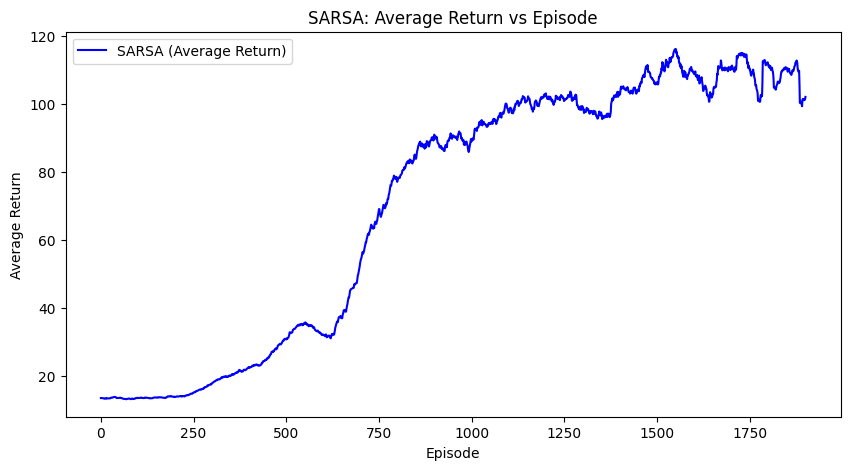

In [8]:
avg_reward_plot(rewards_sarsa)
